# Aprendizado Não Supervisionado

## K-means

Pois bem, o primeiro algoritmo que abordaremos será o K - means. Para isso utilizaremos a biblioteca sklearn, importando KMeans. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Em seguida utilizaremos o dataset Íris, já utilizado em aulas anteriores, com a modificação que, excluiremos da tabela a coluna que contém as espécies das orquídeas ‘Class’.

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Colocando os nomes nas colunas
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Lendo o dataset
dataset = pd.read_csv(url, names=names)

data = dataset.iloc[:, [0, 1, 2, 3]].values

In [4]:
# normalizando os dados
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(data_scaled)

In [5]:
data

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
5,0.305556,0.791667,0.118644,0.125000
6,0.083333,0.583333,0.067797,0.083333
7,0.194444,0.583333,0.084746,0.041667
8,0.027778,0.375000,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


Assim como no algoritmo de aprendizado supervisionado KNN, onde precisávamos informar o valor de K, o mesmo ocorrerá com o K Means do aprendizado não supervisionado. Para calcular o valor de K utilizaremos o método de Elbow. O método basicamente  realiza teste da variância dos dados para o número de clusters. 


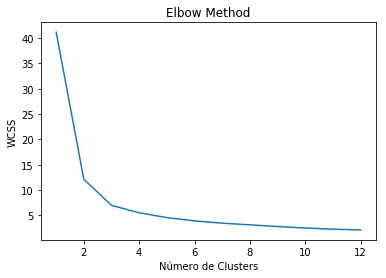

In [7]:
# Escolhendo a quantidade de K ideal usando o Elbow Method 

wcss = []

for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
# init = como o algoritmo será iniciado
# max_inter = número de vezes que o algoritmo irá executar

    
#Fazendo um plot do resultado 
plt.plot(range(1, 13), wcss)
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') #Soma dos erros quadrados  (within cluster sum of squares)
plt.show()

No caso acima escolhemos o número de k = 3. 


In [8]:
# Declarando o método e passando o número de K, em seguida já executamos o algoritmo. 

result = KMeans(n_clusters=3)
result = result.fit(data)

In [9]:
# Resultado da classificação

result.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

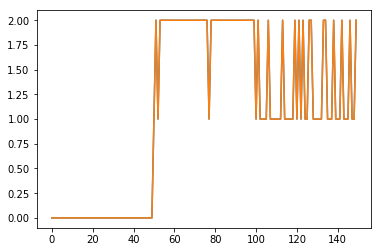

In [11]:
res_km = result.labels_
plt.plot(res_km)
plt.show()

In [12]:
# Valores do Centroides 
result.cluster_centers_

array([[ 0.19611111,  0.59083333,  0.07864407,  0.06      ],
       [ 0.70726496,  0.4508547 ,  0.79704476,  0.82478632],
       [ 0.44125683,  0.30737705,  0.57571548,  0.54918033]])

E se quiséssemos classificar novos dados com base nos padrões encontrados nos dados antigos? Classificando novo dado:


In [13]:
new_dta = [ [4. , 7.4, 1.5, 0.2],
            [1.9, 8. , 8.2, 8.5],
           [6.8, 3. , 7.5, 2.1]]

# Normalizando 
data_scaled = min_max_scaler.fit_transform(new_dta)
new_dta = pd.DataFrame(data_scaled)

In [14]:
result.predict(new_dta)

array([0, 1, 2])

### Exercício

1 - Utilize outra base de dados e tente realizar a classificação por K-means. 

2 - Altere o parâmetro, init = 'k-means++', e veja se possui alguma alteração quanto a predição do novo dado.  


In [102]:
#resposta do exercicío

## Clusterização Hierárquica


Agora iremos trabalhar um pouco com esse classificador, para isso devemos importar outro pacote da biblioteca. 


In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Ward é um tipo de comando dentro da biblioteca, que vai indicar a maneira que irá ser construído a agrupamento, sendo que existem outros métodos como 'single', 'complete' e 'average'. 
Para o cálculo da distância também existem outras alternativas: 'euclidean' (default), 'cityblock', 'hamming', 'cosine'.


In [16]:
h_cluster = linkage(data, 'ward', 'euclidean')

Cophenet compara (correlaciona) os pares de distâncias de todas as suas amostras com aquelas realizadas pelo agrupamento hierárquico. Quanto mais próximo o valor estiver de 1, melhor é o agrupamento em preservar as distâncias originais, o que no nosso caso é bem próximo:

In [18]:
efi, coph_dists = cophenet(h_cluster, pdist(data))
efi

0.85776927008157711

Quando eu visualizo um par formado por linkage(), eu consigo ver os dois dados que foram pareados, a distância deles, e a qual cluster ele foi atribuído.

In [19]:
h_cluster[0]

array([  9.,  34.,   0.,   2.])

### Plotando o Dendrograma

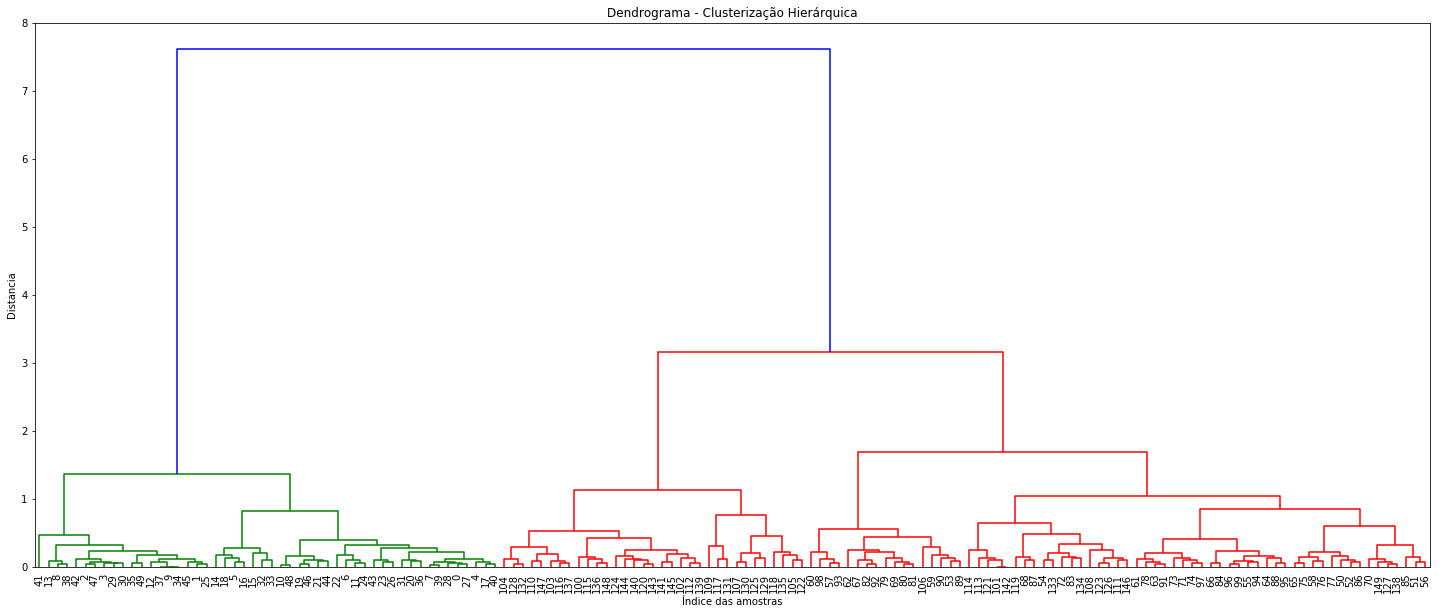

In [20]:
plt.figure(figsize=(25, 10))
plt.title('Dendrograma - Clusterização Hierárquica')
plt.xlabel('Índice das amostras')
plt.ylabel('Distancia')
dendrogram(
    h_cluster,
    leaf_rotation=90.,  # rotação dos valores da legenda do eixo x
    leaf_font_size=10.,  # tamanho da fonte 
)
plt.show()

## Exercício


1 - Altere os parâmetros para o cálculo da distância, mantendo o método ‘ward’. Ocorre alguma alteração no Dendrograma?

2 - Agora fixe a distância para ‘euclidean’ e altere os valores dos métodos de formação do agrupamento. Ocorre alguma alteração no Dendrograma?


In [21]:
#Escreva aqui sua resposta

## Análise do Componentes Principais


Agora iremos realizar a análise dos componentes principais e para isso é de extrema importância realizar a normalização dos dados. 



In [22]:
from sklearn.preprocessing import StandardScaler

especie = dataset.loc[:,['Class']]
data_scal = StandardScaler().fit_transform(data)

Utilizando o método:

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scal)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


Abaixo veremos quais os valores calculados para o componente principal 1 e componente principal 2. 

In [24]:
principalDf[:20]

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
5,-2.070537,1.518549
6,-2.445711,0.074563
7,-2.233842,0.247614
8,-2.341958,-1.095146
9,-2.188676,-0.448629


In [25]:
finalDf = pd.concat([principalDf, especie], axis=1)
finalDf[:20]

,principal component 1,principal component 2,Class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
5,-2.070537,1.518549,Iris-setosa
6,-2.445711,0.074563,Iris-setosa
7,-2.233842,0.247614,Iris-setosa
8,-2.341958,-1.095146,Iris-setosa
9,-2.188676,-0.448629,Iris-setosa


Concatenamos a classificação das orquídeas ao resultado do PCA. 

In [26]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

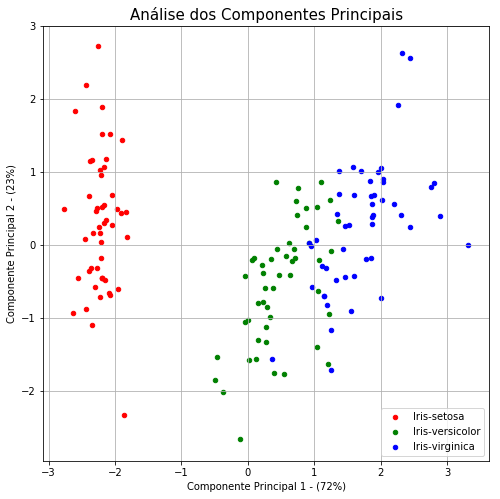

In [30]:
# Parâmetros para o gráfico

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1 - (72%)', fontsize = 10)
ax.set_ylabel('Componente Principal 2 - (23%)', fontsize = 10)
ax.set_title('Análise dos Componentes Principais', fontsize = 15)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']


for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 20)
    
    
ax.legend(targets)
ax.grid()
plt.show()

## Exercícios

Aplique os algoritmos de K-means e de Clusterização hierárquica para o dataset resultante do PCA. Existe alguma alteração? Explique. 


In [1]:
#Escreva aqui sua resposta

Aplique os algoritmos para o dataset de Crimes nos EUA, o mesmo se encontra em formato .csv na mesma pasta desse notebook. 

In [2]:
#Escreva aqui sua resposta